In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style('whitegrid')

# Load the dataset
try:
    df = pd.read_csv('../data/creditcard.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: creditcard.csv not found. Please ensure the file is in the 'data' folder.")
    exit()

Data loaded successfully!


In [2]:
print("Data Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData Info:")
df.info()
print("\nMissing values:")
print(df.isnull().sum())

Data Shape: (284807, 31)

First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


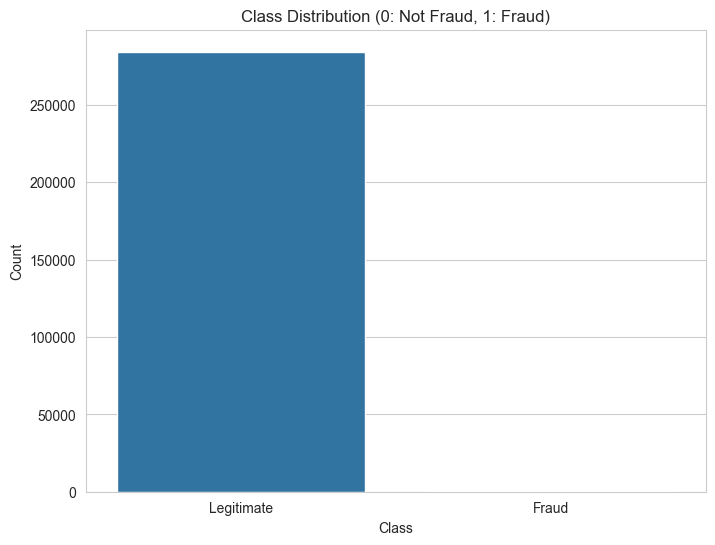


Legitimate transactions: 99.83%
Fraudulent transactions: 0.17%


In [3]:
print("\nClass distribution:")
print(df['Class'].value_counts())

# Visualize the imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Not Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.show()

# Calculate the percentage
legit_count = df['Class'].value_counts()[0]
fraud_count = df['Class'].value_counts()[1]
legit_percent = (legit_count / len(df)) * 100
fraud_percent = (fraud_count / len(df)) * 100

print(f"\nLegitimate transactions: {legit_percent:.2f}%")
print(f"Fraudulent transactions: {fraud_percent:.2f}%")

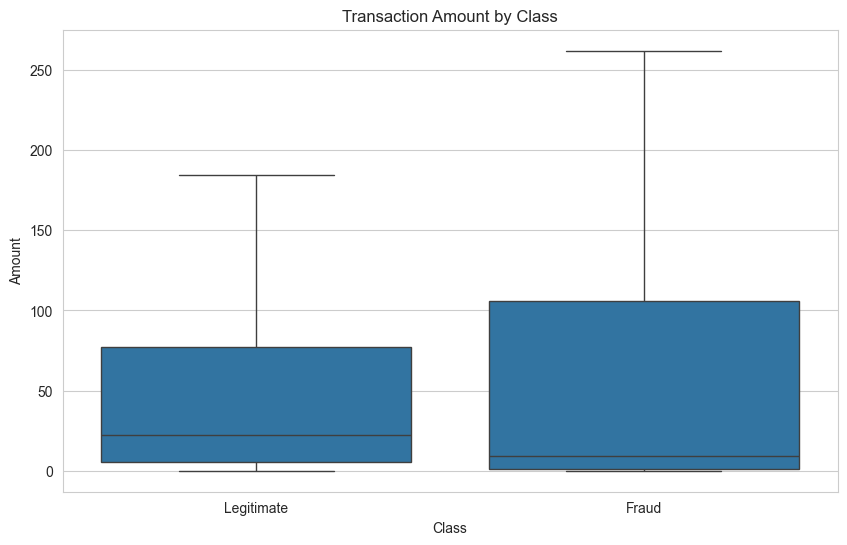

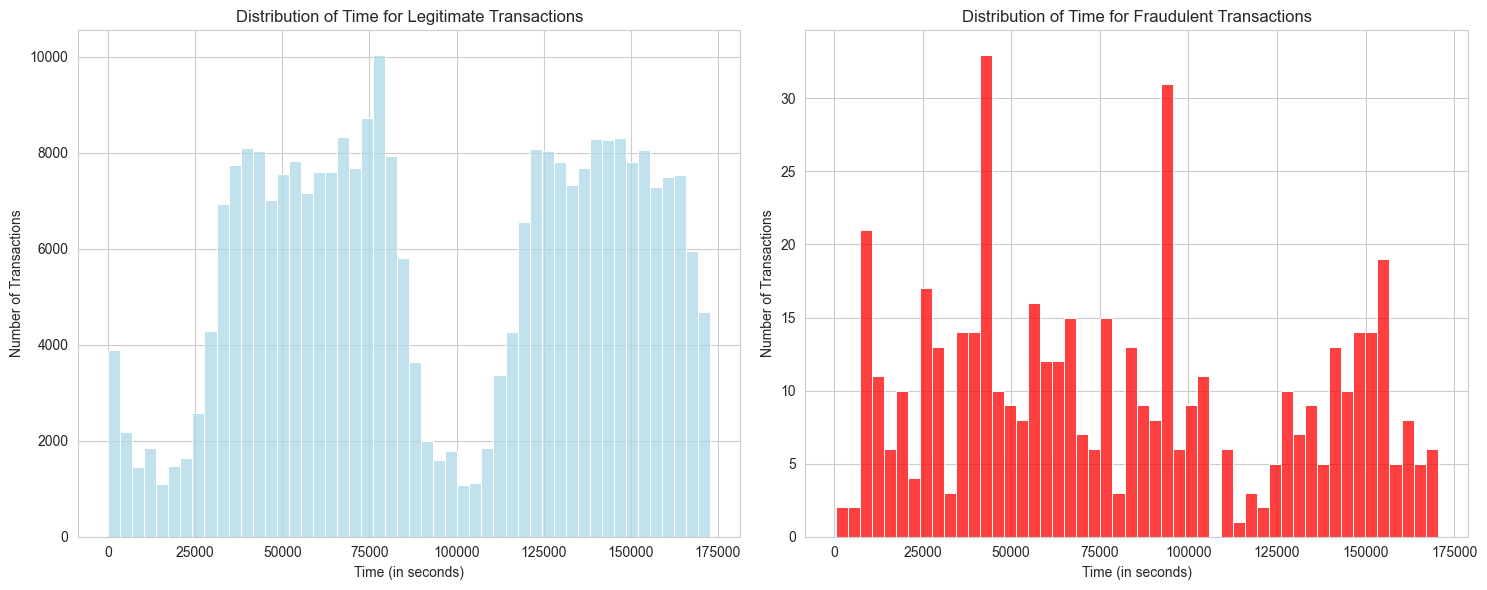

In [4]:
# Distribution of Transaction Amount for both classes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df, showfliers=False) # showfliers=False removes outliers for a cleaner plot
plt.title('Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.show()

# Distribution of 'Time' for both classes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, ax=ax1, color='lightblue')
ax1.set_title('Distribution of Time for Legitimate Transactions')
ax1.set_xlabel('Time (in seconds)')
ax1.set_ylabel('Number of Transactions')

sns.histplot(df[df['Class'] == 1]['Time'], bins=50, ax=ax2, color='red')
ax2.set_title('Distribution of Time for Fraudulent Transactions')
ax2.set_xlabel('Time (in seconds)')
ax2.set_ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Scale the 'Amount' and 'Time' features
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])
X['Time'] = scaler.fit_transform(X[['Time']])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y is crucial for maintaining the class distribution in both sets

--- Training Logistic Regression Model ---
--- Model Evaluation ---
Confusion Matrix:


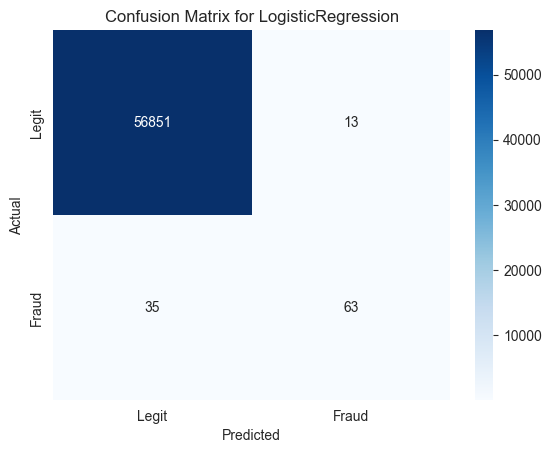


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962


F1 Score: 0.7241
AUC-ROC Score: 0.9575


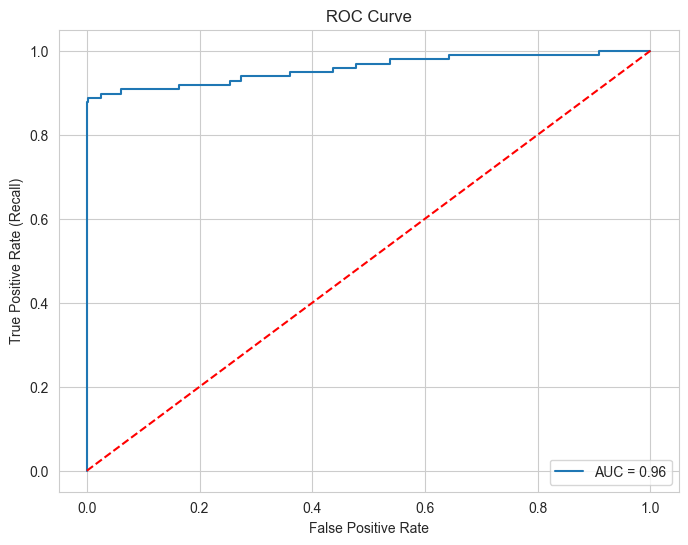


--- Training Random Forest Classifier ---
--- Model Evaluation ---
Confusion Matrix:


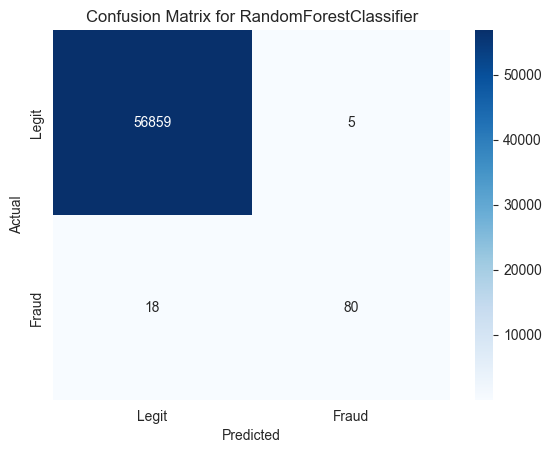


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962


F1 Score: 0.8743
AUC-ROC Score: 0.9630


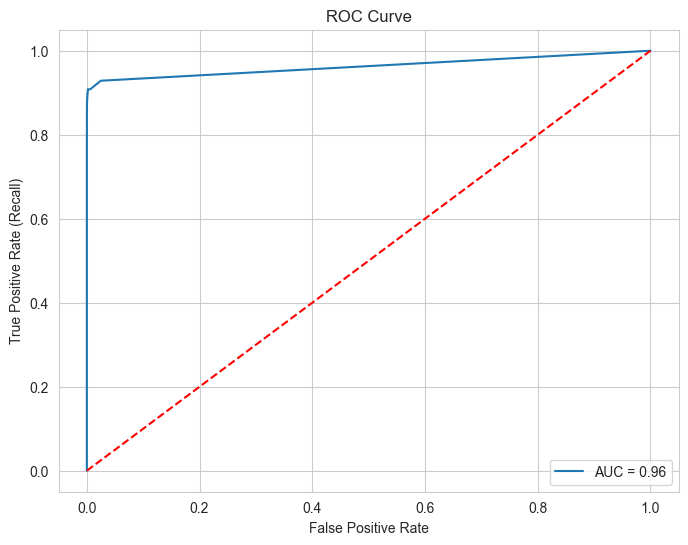

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print("--- Model Evaluation ---")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print(f"\nF1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC Score: {roc_auc_score(y_test, y_prob):.4f}")
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.legend(loc='lower right')
    plt.show()

# --- Logistic Regression ---
print("--- Training Logistic Regression Model ---")
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)
evaluate_model(lr_model, X_test, y_test)

# --- Random Forest Classifier ---
print("\n--- Training Random Forest Classifier ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)

In [7]:
# Get predictions and probabilities for the test set
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Create a DataFrame for Tableau
tableau_df = X_test.copy()
tableau_df['Actual_Class'] = y_test
tableau_df['Predicted_Class'] = y_pred_rf
tableau_df['Predicted_Probability'] = y_prob_rf

# Add back unscaled 'Amount' and 'Time' for business context in Tableau
tableau_df['Amount'] = df.loc[tableau_df.index, 'Amount']
tableau_df['Time'] = df.loc[tableau_df.index, 'Time']

# Export to a CSV file
tableau_df.to_csv('../reports/model_predictions_for_tableau.csv', index=False)
print("\nData exported to '../reports/model_predictions_for_tableau.csv' for Tableau.")


Data exported to '../reports/model_predictions_for_tableau.csv' for Tableau.


In [8]:
# Assuming you've already trained your Random Forest model as 'rf_model'
# If you haven't, go back and run that part of the notebook.
from sklearn.ensemble import RandomForestClassifier

# Re-define features and target if you closed the notebook
# X = df.drop('Class', axis=1)
# y = df['Class']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# Get the predicted class (0 or 1) for the test set
y_pred_rf = rf_model.predict(X_test)

# Get the predicted probability for the positive class (fraud)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [9]:
# Make a copy of the test data (X_test)
# This ensures you don't accidentally modify your original test set.
tableau_df = X_test.copy()

# Add the actual class label (from the original y_test series)
tableau_df['Actual_Class'] = y_test

# Add the model's predicted class and predicted probability
tableau_df['Predicted_Class'] = y_pred_rf
tableau_df['Predicted_Probability'] = y_prob_rf

In [10]:
# Assuming you have the original `df` DataFrame loaded from the start.
# This step retrieves the original 'Amount' and 'Time' values
# by matching the index of the `tableau_df` to the original `df`.
tableau_df['Original_Amount'] = df.loc[tableau_df.index, 'Amount']
tableau_df['Original_Time'] = df.loc[tableau_df.index, 'Time']

In [11]:
# Define the file path. The `../` is crucial for the correct directory.
output_file_path = '../reports/model_predictions_for_tableau.csv'

# Export the DataFrame to a CSV file
# `index=False` is important so that pandas doesn't write the DataFrame's index
# as an extra column in the CSV file.
tableau_df.to_csv(output_file_path, index=False)

# Print a confirmation message to let you know it worked
print("\nSuccessfully created the Tableau data file!")
print(f"File saved at: {output_file_path}")
print("\nFirst 5 rows of the exported data:")
print(tableau_df[['Original_Time', 'Original_Amount', 'Actual_Class', 'Predicted_Class', 'Predicted_Probability']].head())


Successfully created the Tableau data file!
File saved at: ../reports/model_predictions_for_tableau.csv

First 5 rows of the exported data:
        Original_Time  Original_Amount  Actual_Class  Predicted_Class  \
263020       160760.0            23.00             0                0   
11378         19847.0            11.85             0                0   
147283        88326.0            76.07             0                0   
219439       141734.0             0.99             0                0   
36939         38741.0             1.50             0                0   

        Predicted_Probability  
263020                   0.00  
11378                    0.00  
147283                   0.03  
219439                   0.00  
36939                    0.00  
